In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import src.lib.modules as modules
%matplotlib inline
np.set_printoptions(precision=5)
pd.set_option("display.precision", 5,
              'display.max_rows', None,
              'display.max_columns', None,
              'display.width', None,
              'display.max_colwidth', None)

#  TODO: Change the names if needed
# Defining the columns that we are interested in.
x = 'Gap'
y = ['Axial force']  # should be a list
interested_in = y + [x]

# Defining specific parameters for the plots
DATA_PATH = modules.DATA_PATH
snsc = modules.get_color_palette(y)
sns.set_palette(snsc)

# Opening the files
dfs, files, common_name = modules.load_files_df(interested_in=interested_in)

# Merging the dfs and making the values absolute
df_merged = modules.merge_dfs(dfs, files)

Found Files:
1 - "PC20M1.5 adhesion.xls"
2 - "pc20m1.5 adhesion (3).xls"
3 - "pc20m1.5 adhesion (2).xls"
4 - "pc20m1.5 adhesion (4).xls"
5 - "pc20m1.5 adhesion (1).xls"

Files related to -> pc20m1.5


# Looking at the raw data

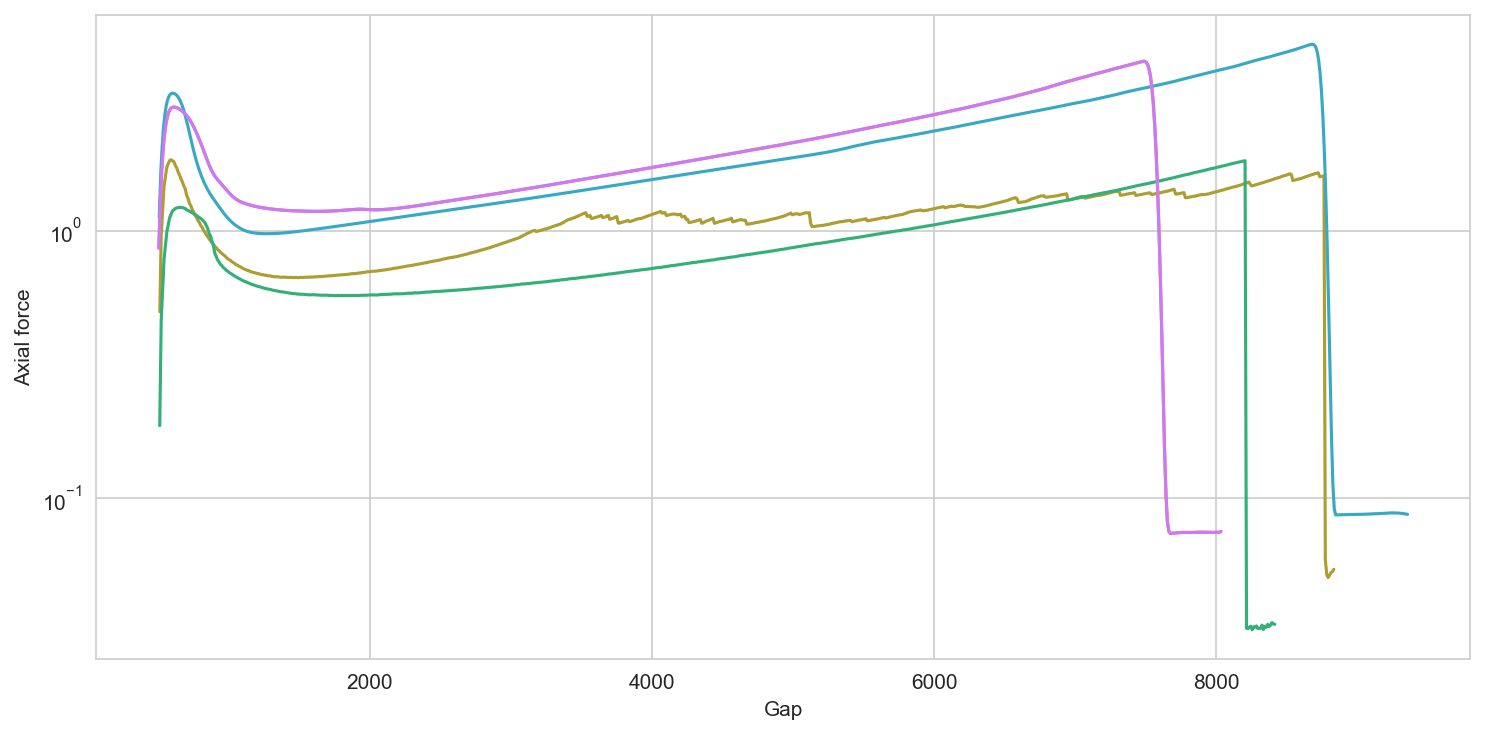

In [3]:
# NOTE: if this plot gets very messy, you can set sep_plots to True

fig, ax = plt.subplots(dpi=150, figsize=(10, 5))
modules.plot_xy(data=df_merged, x=x, y=y, ax=ax, fig=fig,
                log=True,
                # save_str=f"raw_{common_name}.png"
                )

# Calculating the average values
Just averaging out the data will account for the random uncertainty in the measurements, but not the systematic uncertainty. To account for the systematic uncertainty, we need to calculate the standard deviation of the data and use it to calculate the standard error.

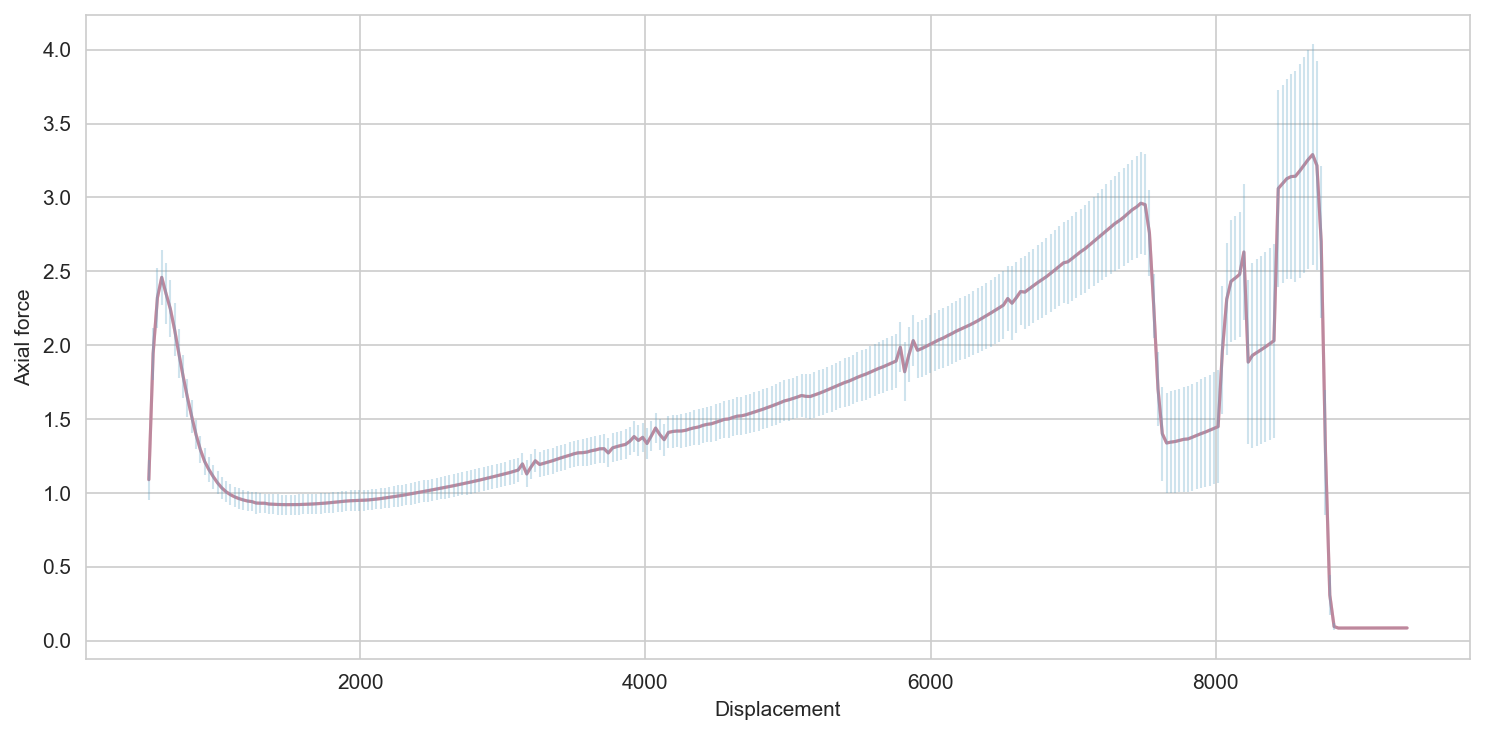

In [6]:
# lower numbers means more noise
noise_mask = 30

min_length = min({df[x].min() for df in dfs})
max_length = max({df[x].max() for df in dfs})

# creating the bins
bins = np.linspace(start=min_length, stop=max_length, num=int((max_length - min_length) / noise_mask))

final_df = modules.av_stderr(df=df_merged, bins=bins, x=x, y=y,
                             rename_x='Displacement',
                             # save_str=f"new_av_{common_name}.xlsx"
                             )

# DELETE THIS
# creating a new column with the bins as labels
# assigning the first bin value as the label for x_av, if you want to use the last bin value, change the labels to bins[1:]
# df_merged['x_av'] = pd.cut(df_merged[x], bins=bins, include_lowest=True, labels=bins[:-1])
# df_merged['x_av'] = df_merged['x_av'].astype(float).round(3)
#
# print(f"bins shape: {bins.shape}")
#
# # averaging the y data and calculating the standard error
# av_dfs = []
# for col in y:
#     # getting the mean values for all values in each bin
#     pre_df = df_merged.copy().groupby('x_av')[col]
#     av_df = pre_df.mean()
#
#     # getting the std values for all values in each bin
#     std_df = pre_df.std()
#     sqrt_len = np.sqrt(pre_df.count())
#     stderr_df = (std_df / sqrt_len).round(5)
#     stderr_df.fillna(value=0, inplace=True)  # todo: should we do this?
#     stderr_df.rename(f'{col}_stderr', inplace=True)
#
#     # adding the error (stderr) values to the averages
#     col_df = pd.merge(av_df, stderr_df, how='outer', on='x_av', suffixes=(False, False))
#
#     # processing the data and saving them
#     col_df.dropna(subset=[col], inplace=True)
#     col_df.reset_index(inplace=True)
#     col_df.rename(columns={'x_av': f'x_av_{col}'}, inplace=True)
#     av_dfs.append(col_df)
#
# # putting everything together
# final_df = pd.concat(av_dfs, axis=1, ignore_index=True)
#
# # saving the result
# final_df.to_excel(join(DATA_PATH, f"average_{common_name}.xlsx"), index=False)
# # this is added for compatibility with app.py
# final_df.to_csv(join(DATA_PATH, f"average_{common_name}.csv"), index=False)
#
# if final_df.isna().sum().any() > 0:
#     raise ValueError("You have NAs, please double check!")

# temporary looking at the result to see if everything is ok

fig, ax = plt.subplots(dpi=150, figsize=(10, 5))
modules.plot_xy(data=final_df, x='Displacement', y=y, ax=ax, fig=fig,
                error=True,
                # save_str= f"average_{common_name}.png"
                )